In [1]:
from basic_tools import *
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
h2_total=pd.read_csv(h2_total_par_filtered_path,index_col='phenotype')
h2_total.shape

(497, 7622)

In [3]:
pheno_select=h2_total.index

In [4]:
len(pheno_select)

497

# Loading h2 results

In [5]:
h2_neale_result=pd.read_csv(h2_path,sep='\t')
h2_neale_result=h2_neale_result.set_index('phenotype')
h2_neale_sorted=h2_neale_result.sort_values('h2_observed',ascending=False)
h2_neale_sorted.columns = h2_neale_sorted.columns.map(lambda x: 'neale.'+str(x))

In [9]:
h2_neale2_result=pd.read_csv(h2_v2_path,sep='\t')
h2_neale2_result=h2_neale2_result.set_index('phenotype')
h2_neale2_sorted=h2_neale2_result.sort_values('h2_observed',ascending=False)
h2_neale2_sorted.columns = h2_neale2_sorted.columns.map(lambda x: 'neale2.'+str(x))

## from my ldsc result of univariate

In [7]:
h2_myuni_sorted=read_ldsc('uni',False)
h2_myuni_sorted.head()

,uni.filename,uni.Total Observed scale h2,uni.Total Observed scale h2_se,uni.Total Liability scale h2,uni.Total Liability scale h2_se,uni.Lambda GC,uni.Mean Chi^2,uni.Intercept,uni.Intercept_se,uni.Ratio
phenotype,,,,,,,,,,
50_irnt,data/out_final/uni.50_irnt.ldsc.log,0.3772,0.0197,0.3772,0.0197,2.5074,4.7497,1.6108,0.0373,0.1629 (0.0099)
20153_irnt,data/out_final/uni.20153_irnt.ldsc.log,0.3293,0.0209,0.3293,0.0209,1.5696,2.1139,1.2127,0.0188,0.1909 (0.0169)
5097_irnt,data/out_final/uni.5097_irnt.ldsc.log,0.2878,0.0233,0.2878,0.0233,1.3169,1.5435,1.1186,0.0134,0.2183 (0.0246)
5098_irnt,data/out_final/uni.5098_irnt.ldsc.log,0.2825,0.0223,0.2825,0.0223,1.3203,1.5455,1.1236,0.0135,0.2266 (0.0247)
5133_irnt,data/out_final/uni.5133_irnt.ldsc.log,0.2771,0.0221,0.2771,0.0221,1.3068,1.5356,1.1237,0.0135,0.231 (0.0252)


## from my ldsc result of various BP scales

In [8]:
suffix_bp_list_power="bp300 bp128 bp64 bp32 bp16 bp8".split()
suffix_bp_list_full="bp300 bp128 bp64 bp32 bp16 bp8".split()

h2_bp_sorted_list=[]
for suffix in suffix_bp_list_full:
    h2_bp_sorted_list.append(read_ldsc(suffix,verbose=True))
    print(suffix,"was loaded")

bp300 was loaded
bp128 was loaded
bp64 was loaded
bp32 was loaded
bp16 was loaded
bp8 was loaded


## merging data.

In [10]:
h2_total=h2_bp_sorted_list[0].copy()
for h2_bp_sorted in h2_bp_sorted_list[1:]:
    h2_total=h2_total.join(h2_bp_sorted)

h2_total=h2_total.join(h2_myuni_sorted)
h2_total=h2_total.join(h2_neale_sorted)
h2_total=h2_total.join(h2_neale2_sorted)

In [11]:
h2_total['uni.Total h2 z']=h2_total['uni.Total Observed scale h2']/h2_total['uni.Total Observed scale h2_se']
h2_total['uni.Total h2 p']=st.norm.sf(h2_total['uni.Total Observed scale h2']/h2_total['uni.Total Observed scale h2_se'])

In [12]:
h2_total.shape

(561, 7677)

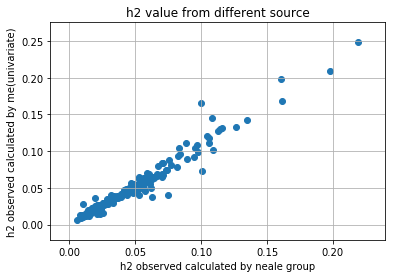

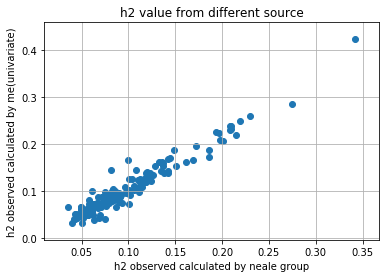

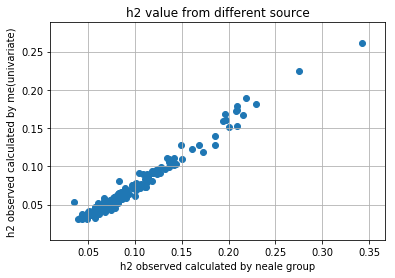

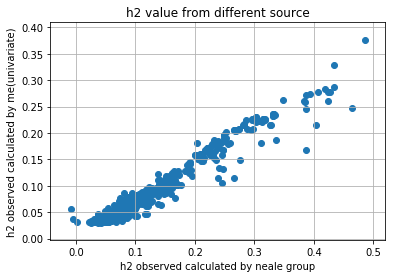

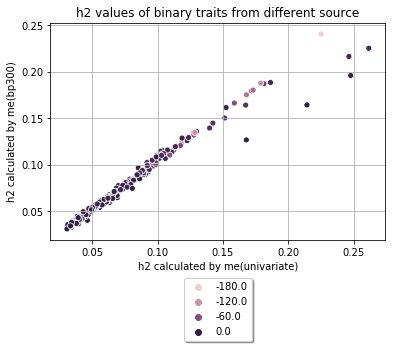

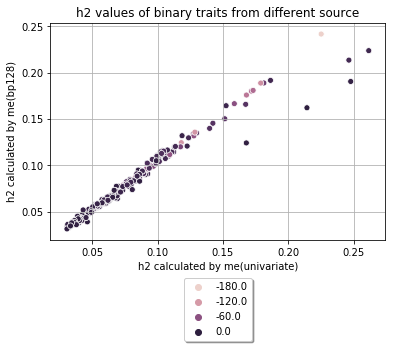

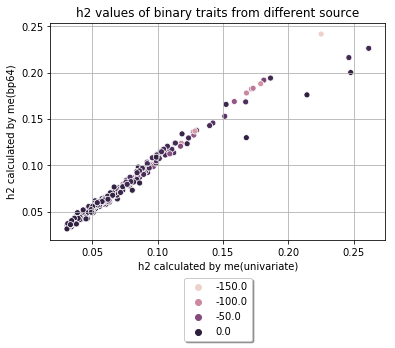

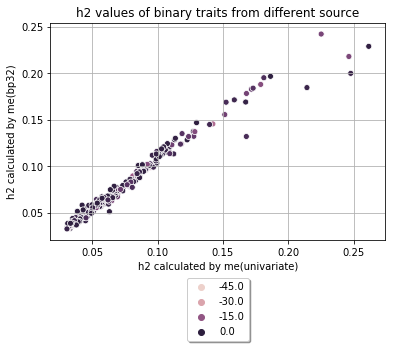

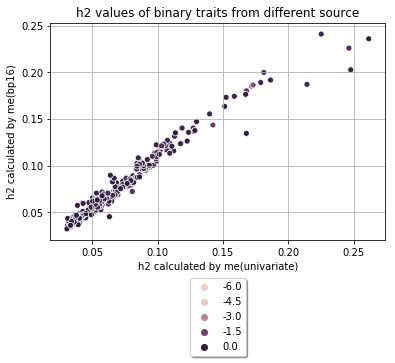

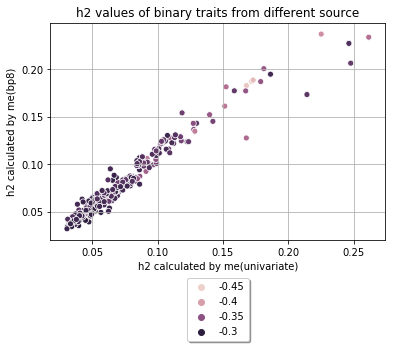

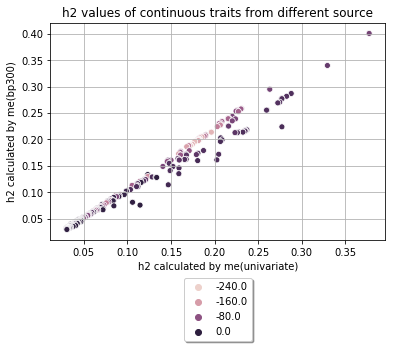

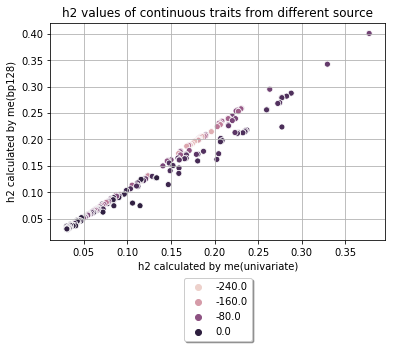

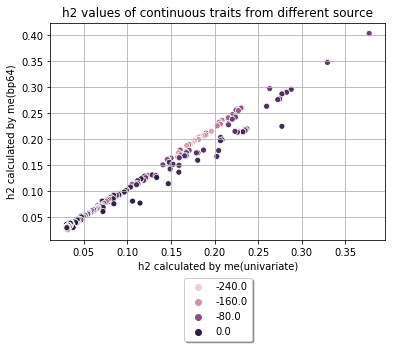

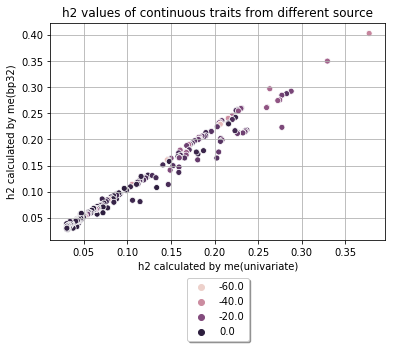

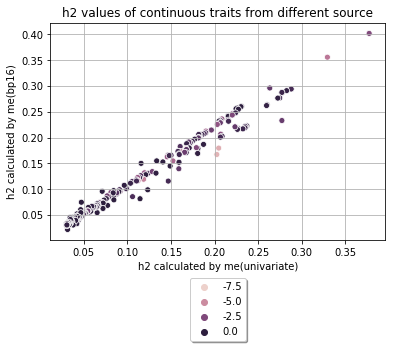

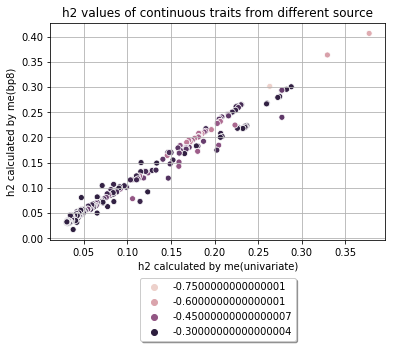

In [15]:
%matplotlib inline

#basic settings for plt
"""
plt.rcParams['font.size']=22
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
"""
plt.rcParams['axes.grid'] = True

plt.title("h2 value from different source")
plt.scatter(h2_total['neale.h2_observed'], h2_total['neale2.h2_observed'])
plt.xlabel("h2 observed calculated by neale group")
plt.ylabel("h2 observed calculated by me(univariate)")
plt.show()

plt.title("h2 value from different source")
plt.scatter(h2_total['neale.h2_liability'], h2_total['neale2.h2_liability'])
plt.xlabel("h2 observed calculated by neale group")
plt.ylabel("h2 observed calculated by me(univariate)")
plt.show()

plt.title("h2 value from different source")
plt.scatter(h2_total['neale.h2_liability'], h2_total['uni.Total Liability scale h2'])
plt.xlabel("h2 observed calculated by neale group")
plt.ylabel("h2 observed calculated by me(univariate)")
plt.show()

plt.title("h2 value from different source")
plt.scatter(h2_total['neale2.h2_liability'], h2_total['uni.Total Liability scale h2'])
plt.xlabel("h2 observed calculated by neale group")
plt.ylabel("h2 observed calculated by me(univariate)")
plt.show()


def plot_compare_h2(suffix='cm300',mode='all'):
    if mode=='all':
        idx=h2_total.index
    elif mode=='continuous':
        idx=h2_total[h2_total['uni.Total Liability scale h2']==h2_total['uni.Total Observed scale h2']].index
    elif mode=='binary':
        idx=h2_total[h2_total['uni.Total Liability scale h2']!=h2_total['uni.Total Observed scale h2']].index
        
    x_data=h2_total.loc[idx]['uni.Total Liability scale h2']
    y_data=h2_total.loc[idx]['{}.Total Liability scale h2'.format(suffix)]
    #x_data=h2_total[idx]['uni.Total Observed scale h2']
    #y_data=h2_total[idx]['{}.Total Observed scale h2'.format(suffix)]
    #c=h2_total[idx]['cm300.Total Liability scale h2']/h2_total[idx]['cm300.Total Observed scale h2']
    #x_data=h2_total[idx]['uni.Total Observed scale h2']*c
    #y_data=h2_total[idx]['{}.Total Observed scale h2'.format(suffix)]*c
    
    hue_data=np.log10(st.norm.sf(h2_total.loc[idx]['{}.Total Observed scale h2'.format(suffix)]/h2_total.loc[idx]['{}.Total Observed scale h2_se'.format(suffix)]))
    
    plt.title("h2 values of {} traits from different source".format(mode))
    sns.scatterplot(x_data,y_data,hue=hue_data)
    plt.xlabel("h2 calculated by me(univariate)")
    plt.ylabel("h2 calculated by me({})".format(suffix))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=10,fancybox=True, shadow=True)
    plt.show()

    

    
for suffix in suffix_bp_list_full:
    plot_compare_h2(suffix,mode='binary')

    
for suffix in suffix_bp_list_full:
    plot_compare_h2(suffix,mode='continuous')
#plot_compare_h2("cm15")
#plot_compare_h2("cm10")
#plot_compare_h2("cm2")


In [16]:
a=pd.read_pickle('23115_irnt.pickle')

In [23]:

[(chr,a[a.CHR==chr]['BP'].iloc[-1]) for chr in range(1,22+1)]

[(1, 249230914),
 (2, 243082521),
 (3, 197900375),
 (4, 190922257),
 (5, 180736061),
 (6, 170934414),
 (7, 159128550),
 (8, 146303560),
 (9, 141104957),
 (10, 135503523),
 (11, 134946451),
 (12, 133840247),
 (13, 115109852),
 (14, 107289436),
 (15, 102461014),
 (16, 90238127),
 (17, 81109537),
 (18, 78017073),
 (19, 59117442),
 (20, 62963628),
 (21, 48119634),
 (22, 51237712)]

In [24]:
h2_total

,bp300.filename,bp300.Total Observed scale h2,bp300.Total Observed scale h2_se,bp300.Total Liability scale h2,bp300.Total Liability scale h2_se,bp300.Lambda GC,bp300.Mean Chi^2,bp300.Intercept,bp300.Intercept_se,bp300.Ratio,...,neale2.isBadPower,neale2.isLowNeff,neale2.isMidNeff,neale2.isExtremeSE,neale2.isHighSE,neale2.isSexBias,neale2.isBadOrdinal,neale2.isNumericOrdinal,uni.Total h2 z,uni.Total h2 p
phenotype,,,,,,,,,,,,,,,,,,,,,
50_irnt,data/out_final/bp300.50_irnt.ldsc.log,0.4004,0.0243,0.4004,0.0243,2.5027,4.5198,1.4446,0.0673,0.1263 (0.0191),...,False,False,False,False,False,False,False,False,19.147208,5.105832e-82
20153_irnt,data/out_final/bp300.20153_irnt.ldsc.log,0.3398,0.0234,0.3398,0.0234,1.5696,2.0516,1.1714,0.0236,0.163 (0.0224),...,False,False,False,False,False,False,False,False,15.755981,3.124117e-56
20015_irnt,data/out_final/bp300.20015_irnt.ldsc.log,0.2949,0.0185,0.2949,0.0185,2.1545,3.5864,1.3002,0.0471,0.1161 (0.0182),...,False,False,False,False,False,False,False,False,17.315789,1.787921e-67
5097_irnt,data/out_final/bp300.5097_irnt.ldsc.log,0.2869,0.0246,0.2869,0.0246,1.3169,1.5267,1.1100,0.0158,0.2088 (0.0299),...,False,False,False,False,False,False,False,False,12.351931,2.377794e-35
5098_irnt,data/out_final/bp300.5098_irnt.ldsc.log,0.2816,0.0239,0.2816,0.0239,1.3203,1.5293,1.1153,0.0160,0.2179 (0.0302),...,False,False,False,False,False,False,False,False,12.668161,4.438533e-37
5134_irnt,data/out_final/bp300.5134_irnt.ldsc.log,0.2776,0.0238,0.2776,0.0238,1.3068,1.5187,1.1156,0.0154,0.2229 (0.0297),...,False,False,False,False,False,False,False,False,12.144737,3.058956e-34
5133_irnt,data/out_final/bp300.5133_irnt.ldsc.log,0.2770,0.0237,0.2770,0.0237,1.3068,1.5207,1.1154,0.0162,0.2216 (0.0311),...,False,False,False,False,False,False,False,False,12.538462,2.299180e-36
5096_irnt,data/out_final/bp300.5096_irnt.ldsc.log,0.2704,0.0227,0.2704,0.0227,1.3374,1.5677,1.1146,0.0170,0.2018 (0.03),...,False,False,False,False,False,False,False,False,12.772093,1.173779e-37
5099_irnt,data/out_final/bp300.5099_irnt.ldsc.log,0.2691,0.0225,0.2691,0.0225,1.3374,1.5701,1.1191,0.0170,0.2088 (0.0299),...,False,False,False,False,False,False,False,False,12.849057,4.353277e-38


In [25]:
suffix_bp_list_power="bp300 bp128 bp64 bp32 bp16 bp8".split()

In [26]:
regression_result_bp_list_dict=dict([make_regression_result_list(h2_total,phenotype,suffix_bp_list_power) for phenotype in phenotypes_par_filtered.index])

In [27]:
h2_bp8_df=pd.DataFrame([[phenotype]+(regression_result_list[-1]['h2']/regression_result_list[-1]['h2'].sum()).tolist() for phenotype,regression_result_list in regression_result_bp_list_dict.items()])
h2_bp8_df=h2_bp8_df.set_index(0)

In [42]:
sum([regression_result_bp_list_dict['23115_irnt'][i].shape[0] for i in range(len(regression_result_bp_list_dict['23115_irnt']))])*497

375235